In [25]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [2]:
data_c = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")
data = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")

def temp_range_to_class(value):
    if value <= 20:
        return "very low"
    elif value <= 40 and value > 20:
        return "low"
    elif value <= 60 and value > 40:
        return "moderate"
    elif value <= 80 and value > 60:
        return "high"
    elif value <= 100 and value > 80:
        return "very high"
    
def temp_range_to_no(value):
    if value <= 20:
        return 0
    elif value <= 40 and value > 20:
        return 1
    elif value <= 60 and value > 40:
        return 2
    elif value <= 80 and value > 60:
        return 3
    elif value <= 100 and value > 80:
        return 4

data["range"] = data["seq_TEMP"].apply(temp_range_to_class)
data["range"] = data["seq_TEMP"].apply(temp_range_to_no)

In [26]:
def temp_range_to_class_40_or_no(value):
    if value <= 60 and value > 40:
        return "40-60"
    else:
        return "rest"
    
def temp_range_to_no_40_or_rest(value):
    if value <= 60 and value > 40:
        return 1
    else:
        return 0


data["range"] = data["seq_TEMP"].apply(temp_range_to_no_40_or_rest)

In [27]:
Reduction_data = data.drop(["seq_id","seq_OGT","seq_TEMP","length"], axis = 1)
Data_Full = Reduction_data.iloc[:,0:9526]
Data_Full = Data_Full.drop(Data_Full.iloc[:,574:1126],axis = 1)

In [28]:
input_d = Data_Full
output_d = data["range"]

In [55]:
input_d['range'] = data["range"]

In [53]:
input_d['range'] = input_d['range'].astype(str)

In [30]:
output_d.value_counts()

0    2662
1     255
Name: range, dtype: int64

In [56]:
from verstack.stratified_continuous_split import scsplit
train, test = scsplit(input_d, stratify = input_d["range"],test_size = 0.3,
                                             train_size = 0.7, random_state = 0)

In [32]:
train["range"].value_counts()

0    1863
1     178
Name: range, dtype: int64

In [ ]:
train["range"]

In [33]:
train

,A,C,D,E,F,G,H,I,K,L,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,range
705,0.087227,0.012461,0.068536,0.093458,0.028037,0.084112,0.009346,0.087227,0.031153,0.074766,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
1441,0.015385,0.007692,0.023077,0.069231,0.007692,0.053846,0.038462,0.100000,0.115385,0.115385,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
1175,0.076923,0.010989,0.062271,0.047619,0.054945,0.042125,0.040293,0.045788,0.040293,0.108059,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
873,0.076923,0.006410,0.054487,0.067308,0.028846,0.089744,0.022436,0.089744,0.057692,0.073718,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
2760,0.061810,0.002208,0.066225,0.026490,0.039735,0.070640,0.008830,0.057395,0.077263,0.059603,...,0.002217,0.00000,0.0,0.0,0.0,0.0,0.002217,0.0,0.002217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,0.062323,0.005666,0.079320,0.082153,0.028329,0.073654,0.016997,0.073654,0.073654,0.087819,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
726,0.086331,0.007194,0.055156,0.047962,0.045564,0.103118,0.028777,0.028777,0.028777,0.095923,...,0.000000,0.00241,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
396,0.076023,0.026316,0.064327,0.052632,0.043860,0.064327,0.043860,0.067251,0.049708,0.087719,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
1279,0.087019,0.008559,0.045649,0.095578,0.029957,0.099857,0.009986,0.018545,0.038516,0.095578,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0


#### OVERSAMPLING

In [58]:
auc_metric = []

from imblearn.combine import SMOTEENN
for i in range(1):
    train, test = scsplit(input_d, stratify = input_d["range"],test_size = 0.3,
                                             train_size = 0.7, random_state = 0)
    
    # X, y = train.drop("range", axis = 1),train["range"]
    # y = LabelEncoder().fit_transform(y)
    # oversample = SMOTE()
    # X, y = oversample.fit_resample(X, y)

    # data_model = pd.DataFrame(X)
    # data_model["range"] = y

    # X_validate = test
    # data_val = pd.DataFrame(X_validate)
    # data_val["range"] = test["range"]

    # data_model_f = data_model
    # data_xgb = data_model_f.drop(["range"], axis = 1)
    # data_xgb_y = data_model_f["range"] 

    # data_val_f = data_val.drop(["range"], axis = 1)
    # data_val_end = data_val["range"]


    data_xgb = train.drop(["range"], axis = 1)
    data_xgb_y = train["range"]
    data_val_f = test.drop(["range"], axis = 1)
    data_val_end = test["range"]

    model = xgb.XGBClassifier(
                         num_parallel_tree = 1,
                         max_depth = 8,
                         learning_rate = 0.05,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.3,
                         sampling_method ='uniform',
                         colsample_bytree = 0.3,
                         objective ='binary:logistic',
                         scale_pos_weight = 10
                        )
    
    model.fit(data_xgb,data_xgb_y,eval_set=[(data_xgb, data_xgb_y),(data_val_f,data_val_end)],early_stopping_rounds=10)

    auc_scr = roc_auc_score(data_val_end,model.predict(data_val_f))
    auc_metric.append(auc_scr)
    

[0]	validation_0-auc:0.71874	validation_1-auc:0.55396
[1]	validation_0-auc:0.79068	validation_1-auc:0.56358
[2]	validation_0-auc:0.82065	validation_1-auc:0.56878
[3]	validation_0-auc:0.84891	validation_1-auc:0.56839
[4]	validation_0-auc:0.87963	validation_1-auc:0.56831
[5]	validation_0-auc:0.90031	validation_1-auc:0.58153
[6]	validation_0-auc:0.90727	validation_1-auc:0.57492
[7]	validation_0-auc:0.91669	validation_1-auc:0.56163
[8]	validation_0-auc:0.92344	validation_1-auc:0.56474
[9]	validation_0-auc:0.93164	validation_1-auc:0.55125
[10]	validation_0-auc:0.93158	validation_1-auc:0.57434
[11]	validation_0-auc:0.93202	validation_1-auc:0.59113
[12]	validation_0-auc:0.93378	validation_1-auc:0.58674
[13]	validation_0-auc:0.94349	validation_1-auc:0.59303
[14]	validation_0-auc:0.94633	validation_1-auc:0.60509
[15]	validation_0-auc:0.94441	validation_1-auc:0.60764
[16]	validation_0-auc:0.95147	validation_1-auc:0.60156
[17]	validation_0-auc:0.95565	validation_1-auc:0.61975
[18]	validation_0-au

In [38]:
model.predict_proba(data_val_f)

array([[0.7648435 , 0.23515648],
       [0.65394074, 0.34605926],
       [0.78577965, 0.21422036],
       ...,
       [0.6189655 , 0.38103446],
       [0.7911621 , 0.20883791],
       [0.6216402 , 0.3783598 ]], dtype=float32)

In [43]:
explainer = shap.Explainer(model, data_xgb)
shap_values = explainer(data_xgb)

In [44]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_xgb)

In [45]:
X100 = shap.utils.sample(data_xgb, 500)
explainer_xgb = shap.Explainer(model, X100)
shap_values_xgb = explainer_xgb(data_xgb)

In [46]:
data_xgb

,A,C,D,E,F,G,H,I,K,L,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
2116,0.148551,0.021739,0.050725,0.076087,0.039855,0.097826,0.007246,0.054348,0.068841,0.043478,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1179,0.075556,0.000000,0.044444,0.084444,0.022222,0.106667,0.004444,0.053333,0.035556,0.088889,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
938,0.073930,0.017510,0.064202,0.073930,0.064202,0.066148,0.036965,0.029183,0.066148,0.062257,...,0.000000,0.0,0.0,0.0,0.001953,0.0,0.000000,0.0,0.0,0.000000
992,0.079570,0.021505,0.055914,0.058065,0.034409,0.060215,0.025806,0.045161,0.055914,0.139785,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
237,0.052265,0.003484,0.062718,0.073171,0.062718,0.080139,0.034843,0.080139,0.066202,0.055749,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,0.092632,0.004211,0.092632,0.071579,0.042105,0.029474,0.023158,0.052632,0.082105,0.092632,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
325,0.087500,0.018750,0.056250,0.012500,0.040625,0.131250,0.021875,0.043750,0.025000,0.046875,...,0.003145,0.0,0.0,0.0,0.000000,0.0,0.003145,0.0,0.0,0.003145
1371,0.128731,0.000000,0.061567,0.048507,0.039179,0.102612,0.013060,0.035448,0.067164,0.085821,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1800,0.087719,0.017544,0.064327,0.073099,0.040936,0.096491,0.032164,0.087719,0.049708,0.061404,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


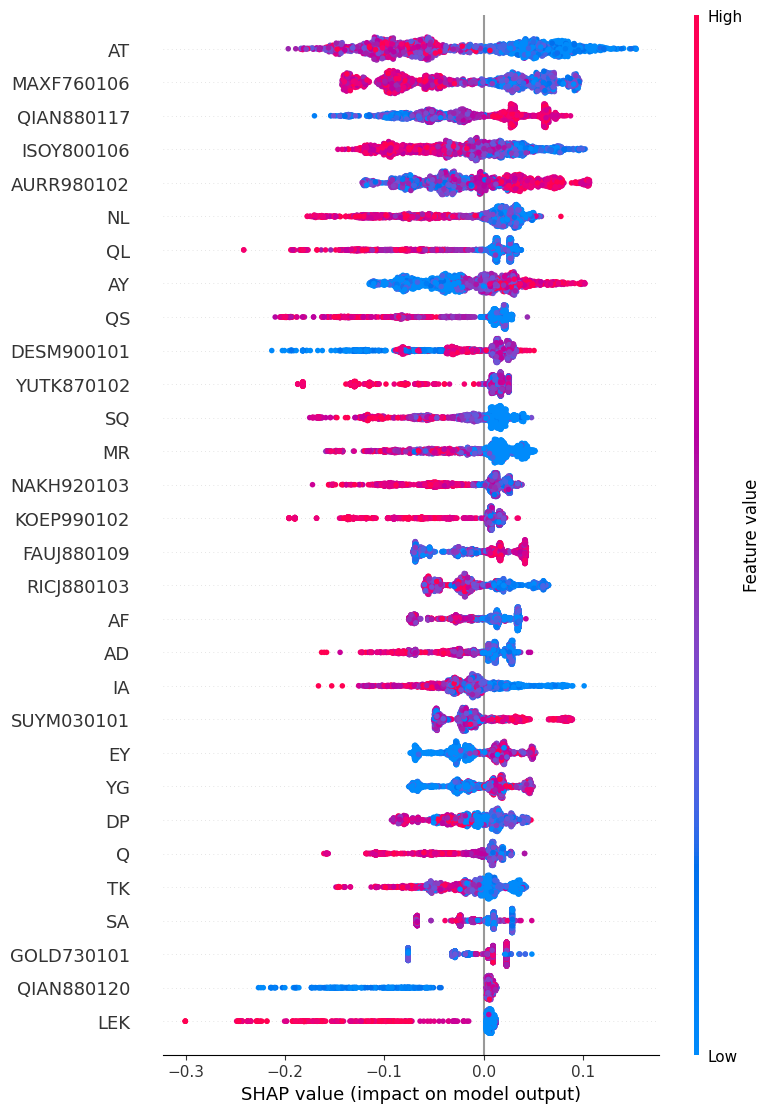

In [51]:
shap.summary_plot(shap_values, data_xgb, max_display = 30)

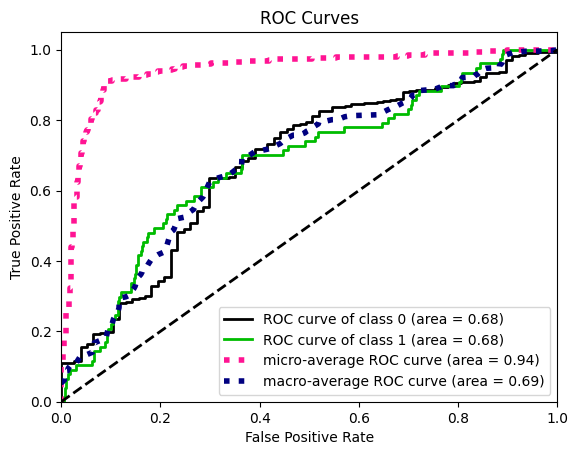

In [50]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(data_val_end,model.predict_proba(data_val_f))
plt.show()

In [17]:
auc_scr = roc_auc_score(data_val_end,model.predict_proba(data_val_f), multi_class='ovr')
auc_scr

0.8314715671117078

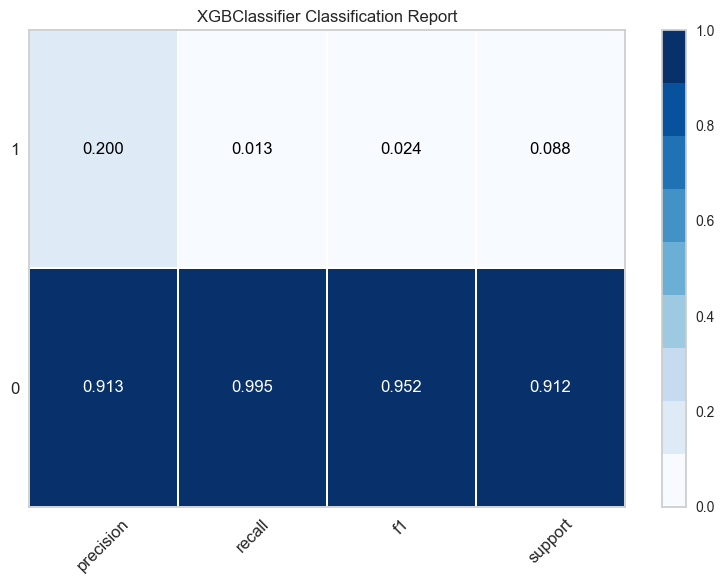

ClassificationReport(ax=<AxesSubplot: title={'center': 'XGBClassifier Classification Report'}>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x00000202A9065490>,
                     estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.3,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metri...
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.05, max_bin=256,
                                             max_cat_threshold=64,
                                             max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=8,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=-1,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=0, ...),
                     support='percent')

In [59]:
from yellowbrick.classifier.classification_report import classification_report

classification_report(model,
                      data_xgb, data_xgb_y,
                      data_val_f,data_val_end,
                      support="percent",
                      cmap="blues",
                      font_size=16,
                      fig=plt.figure(figsize=(8,6))
                     )



In [19]:
y_score = model.predict_proba(data_val_f)
y = data_val_end
n_classes = len(set(y))
n_classes

5

In [20]:
y_score

array([[0.1279091 , 0.40478268, 0.14457098, 0.18969744, 0.13303974],
       [0.08401822, 0.1162454 , 0.13949367, 0.20585056, 0.45439214],
       [0.12506081, 0.5345231 , 0.13612373, 0.11609889, 0.08819342],
       ...,
       [0.10033968, 0.41731358, 0.15898289, 0.21489967, 0.10846422],
       [0.07172512, 0.12141774, 0.10504272, 0.52217084, 0.17964356],
       [0.04702779, 0.7777294 , 0.07624403, 0.04468414, 0.05431467]],
      dtype=float32)

In [21]:
y_test = [[data_val_end]]
y_test

[[2370    3
  1790    4
  151     1
  1002    1
  1702    1
         ..
  1945    1
  884     1
  1893    1
  420     3
  518     1
  Name: range, Length: 876, dtype: int64]]

In [29]:
auc_metric

[0.8314715671117078]

In [17]:
data_xgb

,A,C,D,E,F,G,H,I,K,L,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
0,0.131295,0.017986,0.048561,0.070144,0.026978,0.082734,0.021583,0.062950,0.028777,0.080935,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.044674,0.017182,0.058419,0.092784,0.054983,0.054983,0.006873,0.092784,0.099656,0.092784,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,0.060811,0.013514,0.050676,0.064189,0.054054,0.094595,0.020270,0.060811,0.067568,0.077703,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.073973,0.002740,0.068493,0.046575,0.049315,0.057534,0.016438,0.060274,0.079452,0.073973,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.104972,0.001842,0.073665,0.081031,0.016575,0.073665,0.012891,0.093923,0.082873,0.064457,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.001848,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,0.099272,0.002924,0.051814,0.075586,0.037325,0.081802,0.019656,0.044846,0.038630,0.100776,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
7446,0.075066,0.002323,0.048728,0.095277,0.049222,0.075066,0.028024,0.099287,0.080063,0.103790,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.002336,0.0,0.0
7447,0.101765,0.006671,0.028161,0.084886,0.028653,0.096168,0.019431,0.026101,0.047099,0.119718,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
7448,0.065521,0.006666,0.051770,0.097443,0.034513,0.083197,0.016418,0.052189,0.058361,0.099120,...,0.0,0.0,0.0,0.0,0.001338,0.001338,0.0,0.000000,0.0,0.0


In [18]:
data_xgb_y


0       1
1       3
2       1
3       1
4       2
       ..
7445    4
7446    4
7447    4
7448    4
7449    4
Name: range, Length: 7450, dtype: int64

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'learning_rate': [0.01,0.05,0.07,0.1],  
              'gamma': [1, 0.1, 10,50,100], 
              'max_depth':[5,8,10,15],
              'subsample': [0.1,0.3,0.5,0.7],
              'colsample_bytree':[0.05,0.1,0.2,0.4],
              'num_parallel_tree': [1],
              'verbosity': [1],
              'booster':['gbtree'],
              'tree_method':['auto'],
              'eval_metric':['auc'],
              'sampling_method':['uniform'],
              'objective':["multi:softprob"],
              'n_jobs':[-1]}  

n_iter_search = 10
model = xgb.XGBClassifier()
random = RandomizedSearchCV(model, param_grid, refit = True, verbose = 2,n_jobs=-1, cv = 2, n_iter= n_iter_search) 
random.fit(data_xgb,data_xgb_y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.05, 0.1, 0.2,
                                                             0.4],
                                        'eval_metric': ['auc'],
                                        'gamma': [1, 0.1, 10, 50, 100],
                                        'learning_rate': [0.01, 0.05, 0.07,
                                                          0.1],
                                        'max_depth': [5, 8, 10, 15],
                                        'n_jobs': [-1],
                                        'num_parallel_tree': [1],
                                        'objective': ['multi:softprob'],
                                        'sampling_method': ['uniform'],
                                        'subsample': [0.1, 0.3, 0.5, 0.7],
                                        'tree_method': ['auto'],
                                        'verbosity': [1]},
                   verbose=2)

In [22]:
cv_2_results  = pd.DataFrame(random.cv_results_)
cv_2_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbosity,param_tree_method,param_subsample,param_sampling_method,param_objective,param_num_parallel_tree,...,param_gamma,param_eval_metric,param_colsample_bytree,param_booster,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,152.579387,0.365024,2.710752,0.011967,1,auto,0.5,uniform,multi:softprob,1,...,50,auc,0.1,gbtree,"{'verbosity': 1, 'tree_method': 'auto', 'subsa...",0.718926,0.700671,0.709799,0.009128,1


In [20]:
cv_2_results.columns

NameError: name 'cv_2_results' is not defined

In [21]:
random.best_params_

{'verbosity': 1,
 'tree_method': 'auto',
 'subsample': 0.5,
 'sampling_method': 'uniform',
 'objective': 'multi:softprob',
 'num_parallel_tree': 1,
 'n_jobs': -1,
 'max_depth': 15,
 'learning_rate': 0.07,
 'gamma': 50,
 'eval_metric': 'auc',
 'colsample_bytree': 0.1,
 'booster': 'gbtree'}

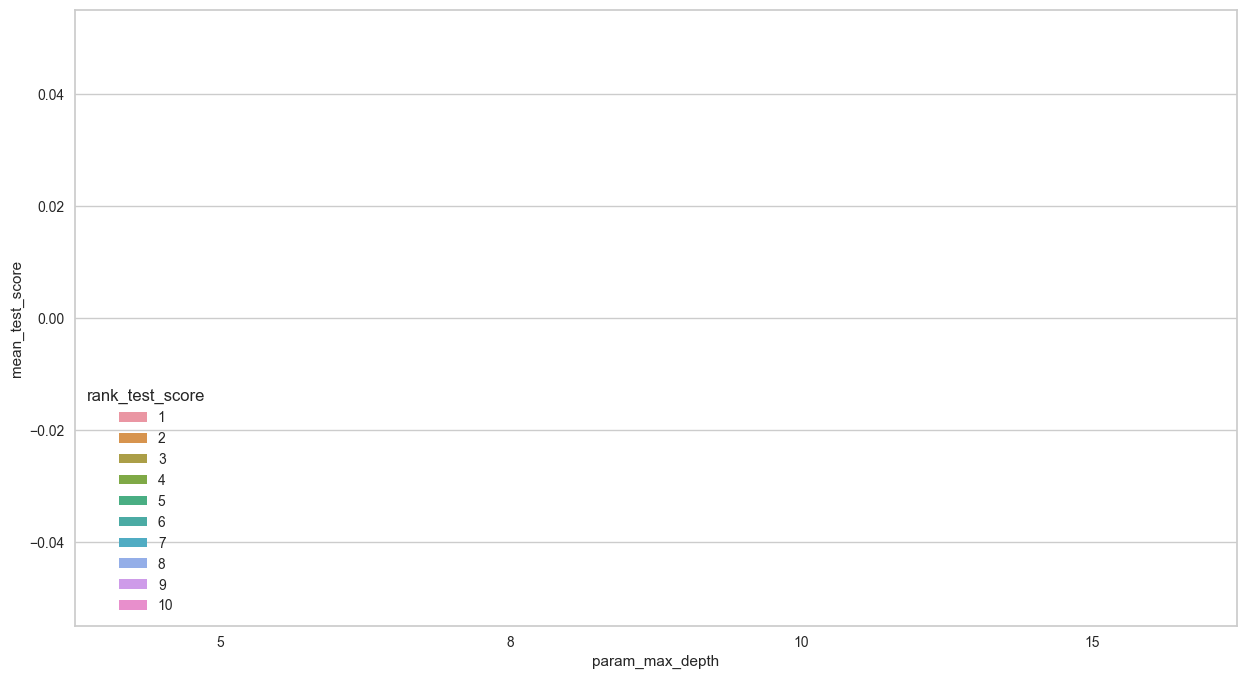

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x="param_max_depth",

           y="mean_test_score",

           hue="rank_test_score",width=2,

           data=cv_2_results)

plt.show()

In [35]:
cv_2_results['rank_test_score'] = cv_2_results['rank_test_score'].astype(str)
cv_2_results['param_max_depth'] = cv_2_results['param_max_depth'].astype(str)
cv_2_results['param_gamma'] = cv_2_results['param_gamma'].astype(str)

cv_2_results['param_colsample_bytree'] = cv_2_results['param_colsample_bytree'].astype(str)
cv_2_results['param_subsample'] = cv_2_results['param_subsample'].astype(str)

In [36]:
plt.figure(figsize=(1,5))
fig = px.bar(cv_2_results, x='param_colsample_bytree', y="mean_test_score", color="rank_test_score", hover_data=['rank_test_score'],
             title="Columns Subsampling and Impact on Model Performace")
fig.update_layout(barmode='group')
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,)
fig.show()

<Figure size 100x500 with 0 Axes>

In [30]:
auc_metric = []

from imblearn.combine import SMOTEENN
for i in range(1):
    train, test = scsplit(input_d, stratify = input_d["range"],test_size = 0.2,
                                             train_size = 0.8, random_state = 0)
    
    X, y = train.drop("range", axis = 1),train["range"]
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    data_model = pd.DataFrame(X)
    data_model["range"] = y

    X_validate = test
    data_val = pd.DataFrame(X_validate)
    data_val["range"] = test["range"]

    data_model_f = data_model
    data_xgb = data_model_f.drop(["seq_TEMP","range"], axis = 1)
    data_xgb_y = data_model_f["range"] 

    data_val_f = data_val.drop(["seq_TEMP","range"], axis = 1)
    data_val_end = data_val["range"]

    model = xgb.XGBClassifier(
                         num_parallel_tree = 100,
                         max_depth = 8,
                         learning_rate = 0.1,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.1,
                         sampling_method ='uniform',
                         colsample_bytree = 0.1,
                         objective ='multi:softprob'
                        )
    
    model.fit(data_xgb,data_xgb_y,eval_set=[(data_xgb, data_xgb_y),(data_val_f,data_val_end)],early_stopping_rounds=3)

    auc_scr = roc_auc_score(data_val_end,model.predict_proba(data_val_f),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    

In [31]:
data_model["range"].value_counts()

0    1435
4    1418
3    1396
2    1389
1     257
Name: range, dtype: int64